# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display, Image # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [0, 200, 400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,3067,13240,23127,3941,9959,731
2,4446,906,1238,3576,153,1014


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,66.4,83.9,65.0,7.5,68.2,63.0
200,24.3,91.8,94.5,77.7,94.1,41.4
400,30.9,11.1,8.4,75.5,14.0,52.3


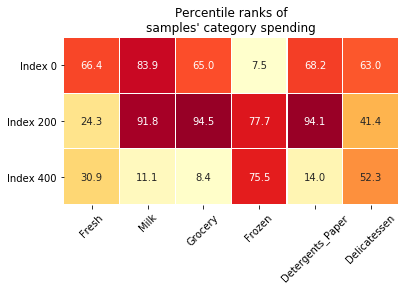

In [4]:
# Sai: I want to explore more!

import matplotlib.pyplot as plt
import seaborn as sns

# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
display(pcts)

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in reversed(indices)], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**  

#### Customer index 0:
* Fresh: Very close to the mean
* Milk: Near 75%
* Grocery: Slightly above the mean 
* Frozen: A really small value which even less than 25%
* Detergents_Paper: Slightly above the mean 
* Delicatessen: Slightly below the mean 

In general, this customer consums different categories with a averge range anually. It could be an **Restaurant** or a place that can provide different food for people. 


#### Customer index 200:
* Fresh: Very close to 25%
* Milk: over 75% - very high!
* Grocery: over 75% - very high!
* Frozen: over 75% - very high!
* Detergents_Paper: over 75% - very high!
* Delicatessen:  Between 25% and 50%

All product categories of this customer are quite high, including milk, grocery, frozen and detergrents paper. Base of these characteristic, I think it's a place that serve a huge amount of customers with coffee and sandwich, it could be a ** cafe**.

Comparing to previous customer, it's not using so much fresh and buy lest Delicatessen. Because it uses a lot of Milk,	Grocery, Frozen,	Detergents_Paper. I guess it's a place that receive lots of people and uses a lot of Milk, it could be a **Coffee shop**.

#### Customer index 400:
* Fresh: Slightly above 25%
* Milk: Far under 25% - very low!
* Grocery: Far under 25% - very low!
* Fozen: between 25% and 50% 
* Detergents_Paper: Close to the mean
* Delicatessen: Close to 50%

The customer focuses on fozen, fresh and delicatessen products. As such, it could likely be an **Meat retailer/supermarkets**. As such, it could likely be an open-air market where fresh is of great importance, or a large grocer known particularly for selling meat.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:
#from sklearn import cross_validation # deprecation warning
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
    
features_names = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
print("{}Predict removed features by others{}".format("-"*12, "-"*12))

for idx in range(len(features_names)):
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    to_remove = features_names[idx] # feature to remove
    new_data = data.drop(to_remove,axis=1)
    y = data[to_remove]

    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = model_selection.train_test_split(new_data, y, test_size=0.25, random_state=1)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=1).fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    
    print("\n{}: {}".format(to_remove,str(score)))
    print("Features: " + str(X_train.columns.values))
    print("Feature Importances: " + str(regressor.feature_importances_))


------------Predict removed features by others------------

Fresh: -0.9233736592978437
Features: ['Milk' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
Feature Importances: [0.16428118 0.11205181 0.44453645 0.10572724 0.17340331]

Milk: 0.5158499438066617
Features: ['Fresh' 'Grocery' 'Frozen' 'Detergents_Paper' 'Delicatessen']
Feature Importances: [0.32042101 0.5142706  0.05099994 0.05371221 0.06059624]

Grocery: 0.7957683115761958
Features: ['Fresh' 'Milk' 'Frozen' 'Detergents_Paper' 'Delicatessen']
Feature Importances: [0.01920745 0.09009498 0.0248479  0.83887826 0.0269714 ]

Frozen: -0.6495743273336552
Features: ['Fresh' 'Milk' 'Grocery' 'Detergents_Paper' 'Delicatessen']
Feature Importances: [0.09431879 0.07158285 0.062858   0.13581245 0.63542791]

Detergents_Paper: 0.8152412791948308
Features: ['Fresh' 'Milk' 'Grocery' 'Frozen' 'Delicatessen']
Feature Importances: [0.02723877 0.05522771 0.87136015 0.015022   0.03115137]

Delicatessen: -0.4291251956585451
Features: ['Fresh' 

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:** 
* I attempted to predict Milk and the decision tree managed to fit it with **R2  score** 0.5158, showing this feature can be approximated (to some extent) with other features.
* As we see, the most similar feature to `Milk` is `Grocery` ($R^{2} = 0.523$) followed by `Detergents_Paper` ($R^{2} = 0.297$). This is quite reasonable: all three features describe items sold in supermarkets.

Although this feature can be approximated with other features, I'd still consider it essential. There are two reasons:
- ($R^{2} = 0.5243$) means we lose a lot of variance if we drop `Milk`. I'd have considered dropping our feature if r-squared had been above 0.8 or even 0.9.
-  We have a small dataset both in terms of training examples and features. Since we don't have an abundance of data, every piece of information is very important and should be used.

The R2 score table of the all features are below:

|Feature| score         |    
|------|----------------|
|Fresh | -0.923373659298 |
|Milk  | 0.515849943807 | 
|Grocery | 0.795768311576 |
|Frozen | -0.649574327334|
|Detergents_Paper | 0.815241279195 |
|Delicatessen | -0.429125195659 |

Further more, Detergents_Paper got the higest score. That means that we can predict Detergents_Paper values using the other five features with an accuracy of 0.81. The same happend with Grocery, which score was 0.79. which means we can remove it and predict it using the other five values.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

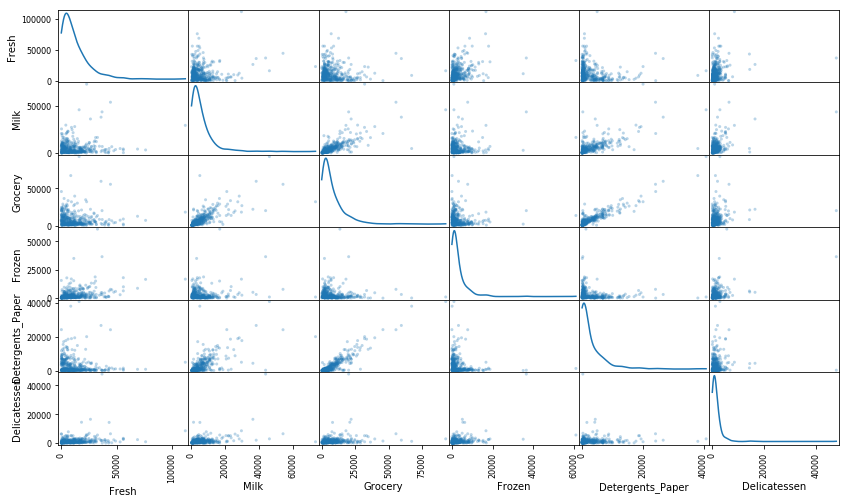

In [6]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

 Yes, there are definitely a few that stick out. Detergents_Paper seems to have really good correlation with Grocery, as well as a decent correlation to Milk. Accordingly, Grocery and milk also have a bit of correlation.

Some of this also seems to stem from the data being bunched into the bottom left (i.e. closer to the origin), likely caused by some very large retailers buying much more than delis, cafes or small markets. My guess is that if some of the largest buyers were removed, some correlations might be more apparent within the data.

This does confirm what I thought about Delicatessen - there is very little correlation between it and the other data. Again this may be because of some big buyers scrunching down the data toward the origin - if we were zoomed in on the data, there may actually be a bit more correlation after kicking out some of the big buyers.

Overall, the data **is not normally distributed**, as **it is skewed** with a very long rightward tail, as is shown by the the plots along the diagonal of the above matrix. This can result in **mean distortion** and Median should be more tolerant to such problems.

Though we can through the above histogram to decide whether the feature has any correlation , but I'd like to redraw it for a more clear understanding of how our data distributed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe45ac30be0>,
      dtype=object)

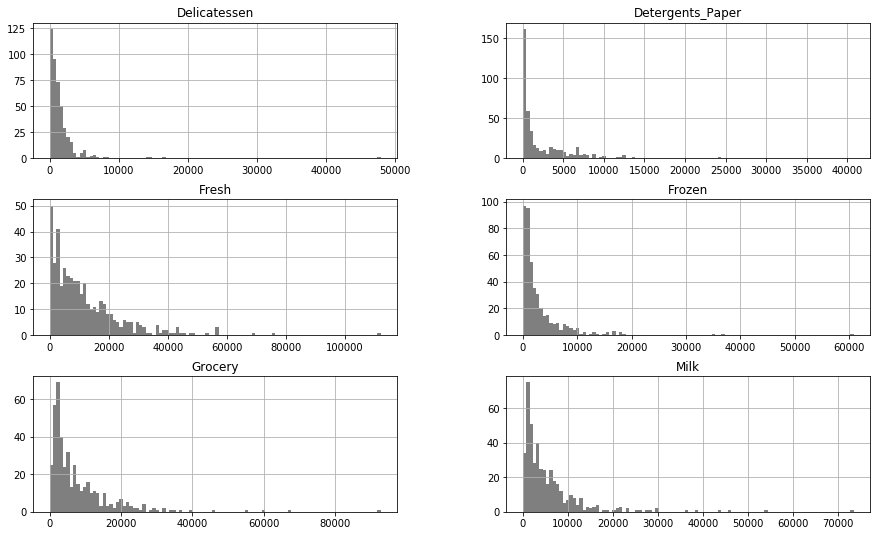

In [7]:
data.hist(color='k', alpha=0.5, bins=100, figsize=(15,9))

Also, if we check the diagonal, the data is distributed following a log-normal distribution. The data is skewed.

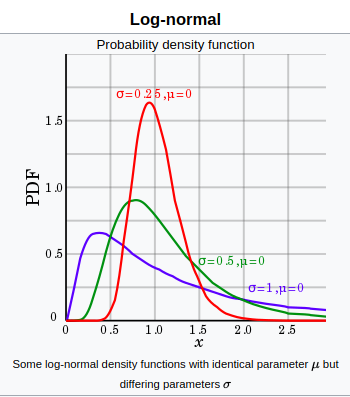

In [8]:
Image(filename= "./img/lognormal.png")

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

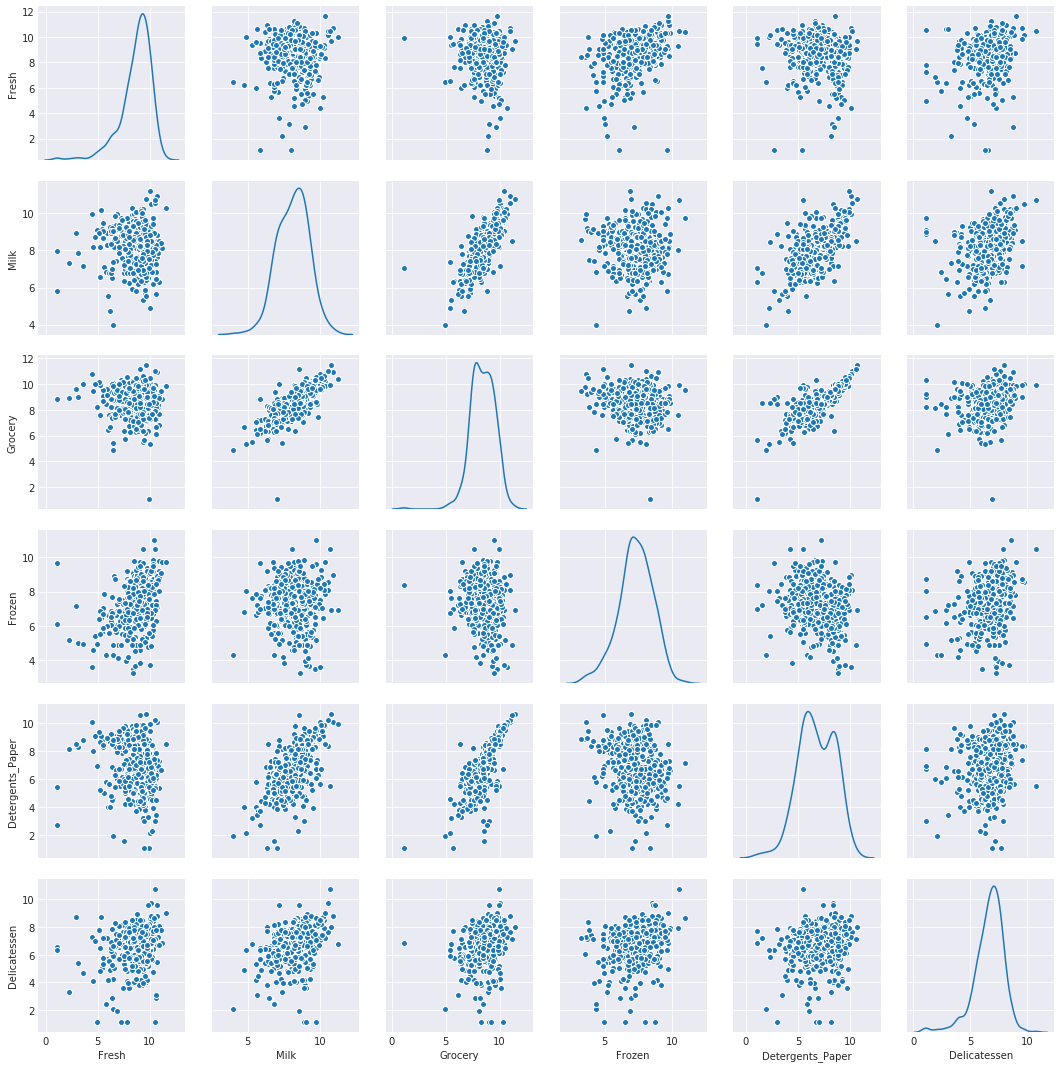

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
# pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Using seaborn instead (looks much prettier!)
sns.set_style('darkgrid')
sns.pairplot(log_data, diag_kind='kde', palette='dark')

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [11]:
common_outliners_idx = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) * 1.5
    
    # Display the outliers
    outliners = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    common_outliners_idx += outliners.index.tolist()
    print("\n\nData points considered outliers for the feature '{}':".format(feature))
    display(outliners)
    

# look at the outlier points now stored in idx
print("\nAll outliners:")
print(sorted(common_outliners_idx))
print("\n The below data points are outliers in multiple features:")
duplicated_outliners_idx = sorted({i for i in common_outliners_idx if common_outliners_idx.count(i) > 1})
print(duplicated_outliners_idx)

# remove the extras in idx
for idx in duplicated_outliners_idx:
    common_outliners_idx.remove(idx)
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = common_outliners_idx

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382




Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275




Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442




Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244




Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101




Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



All outliners:
[38, 57, 65, 65, 66, 66, 75, 75, 81, 86, 95, 96, 98, 109, 128, 128, 137, 142, 145, 154, 154, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

 The below data points are outliers in multiple features:
[65, 66, 75, 128, 154]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:** 

These are the datapoints that considered outliers in more than one feature:

| data id | features          |
|---------|-------------------|
| 65      | Fresh - Frozen |
| 66 | Delicatessen - Fresh |
| 75 | Detergents_Paper - Grocery |
| 128 | Delicatessen - Fresh|
| 154 | Grocery - Delicatessen - Milk |

I would remove the five points because they potentially are going to be in other cluster or can move the centroid when clustering. Removing the outliers could help to find easily the centroid.

## Feature Transformation
In this section you will use principal component analysis (PCA - **主成份分析**) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

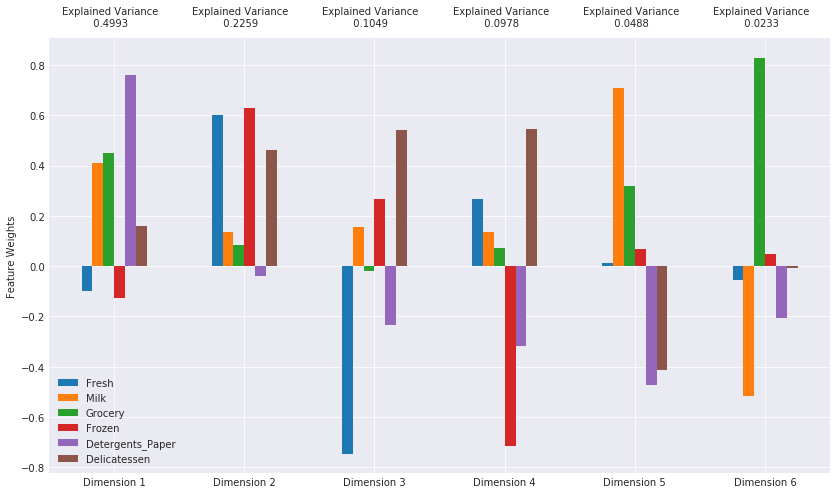

In [12]:
from sklearn.decomposition import PCA

# TODO: Apply PCA to the good data with the same number of dimensions as features
pca = PCA()
pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot, vs is our own library for [visualizations code visuals.py]
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

As we know, PCA is a nonparametric method that finds the most appropriate basis for a dataset. The idea is that the new basis filters out the noise and reveals hidden properties in data better than the original one. It may also be used as **a dimensionality reduction technique** since each of the PCs tries to maximize the remaining amount of variance.

First, let's visualize the percentage of variance explained by each PC:

Text(0.5,0.98,'Explained Variance, %')

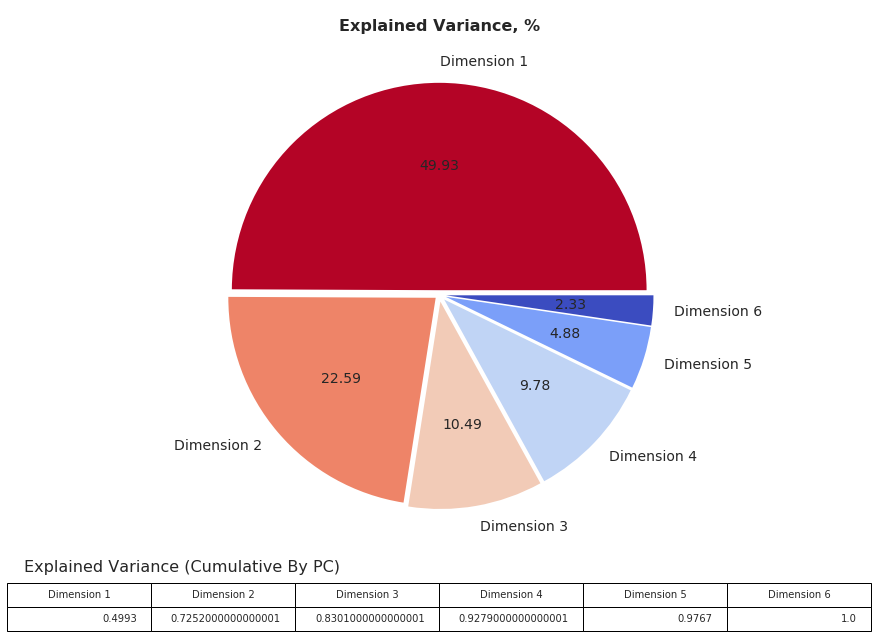

In [13]:
cum_dimensions_sum = pca_results['Explained Variance'].cumsum()

ax = pca_results.plot.pie(y='Explained Variance', figsize=(8,8), cmap='coolwarm_r', legend=None,
                    fontsize=14, autopct='%.2f', explode=[0.02,0.02,0.03,0.03,0.03,0.03], radius=0.9)
ax.yaxis.set_visible(False)
ax.set_position([0,0,1,1])

table = plt.table(cellText=[cum_dimensions_sum.values], colLabels=list(cum_dimensions_sum.keys()), loc='bottom')
plt.text(-1.8,-1.2,'Explained Variance (Cumulative By PC)',size=16)
table.set_fontsize(14)
table.scale(1.5, 2)
plt.suptitle("Explained Variance, %", fontsize=16, fontweight='bold')

The first two principal components (PC) explain `0.4829 + 0.2557 = 0.7386` or **73.9%** of the variance. This is enough to use PC1 and PC2 for data visualization.

We get up to nearly `0.4829 + 0.2557 + 0.1007 + 0.0980 = 0.937` or **93.7%**  of the variance explained with the first four principal components.

Similarly to what I noticed earlier, the most variance is explained in the first principal componenet with Detergents_Paper, Grocery, and Milk, all of which have fairly negative weights. As such, detergents papers is a good indicator of spending on Grocery and Milk.

The second principal component focuses on the other three dimensions, with heavy negative weights on Fresh, Frozen, and Delicatessen, with very little weight to the three in the first PC. Any of these three are good indicators of spending on the other couple, with little bearing on the three from the first PC.

The third principal component is a little more interesting, especially given that in the second PC Fresh and Delicatessen were both fairly negatively weighted. This one seems to indicate that a smaller portion of the variance is actually explained by giving a negative weight to Fresh and a positive weight to Delicatessen, with smaller effects from the others (besides Grocery, which is almost completely disregarded in this principal component).

The fourth principal component, similar to the third, also weights an opposing relationship to the second PC. This time, Frozen gets a heavy negative weighting against a positive weighting for Delicatessen. Compared to 2 and 3, this appears to be an explained variance when giving more of a weight to Fresh - which makes sense, as more Fresh food would logically mean less Frozen food. So in this PC, higher Fresh combined with higher Delicatessen means very little Frozen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7793,-0.6604,-0.8247,1.6580,0.0903,-0.4808
1,3.0820,0.1314,0.3994,-1.4197,0.4747,0.2263
2,-2.4842,-0.0147,0.9005,-0.3315,-0.5147,0.0357


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [15]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

Let's recalculate the outliers after PCA transformation. We won't drop the following outliers (it is not required by this assignment), but this process is interesting per se and can definitely be used in real life.

In [16]:
outliers_pca = pd.DataFrame()

for feature in reduced_data.keys():
    Q1 = np.percentile(reduced_data[feature], 25)
    Q3 = np.percentile(reduced_data[feature], 75)
    step = 1.5 * (Q3 - Q1)
    outliers_pca = outliers_pca \
                   .append(reduced_data[~((reduced_data[feature] >= Q1 - step) & (reduced_data[feature] <= Q3 + step))])
    
    
# How many outliers are there?
len(outliers_pca)    

4

Let's build a simple scatter plot to visualize the results of PCA:

Text(0,0.5,'Dimension 2')

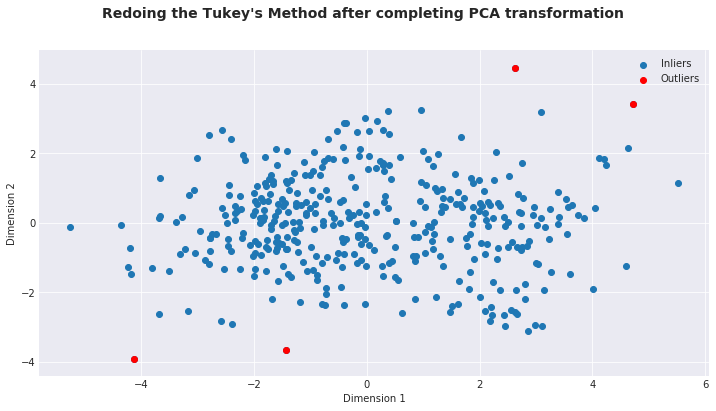

In [17]:
plt.figure(figsize=(12,6))
plt.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'])
plt.scatter(outliers_pca['Dimension 1'], outliers_pca['Dimension 2'], color='red')
plt.legend(['Inliers', 'Outliers'])
plt.suptitle("Redoing the Tukey's Method after completing PCA transformation", fontsize=14, fontweight='bold')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7793,-0.6604
1,3.0820,0.1314
2,-2.4842,-0.0147


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

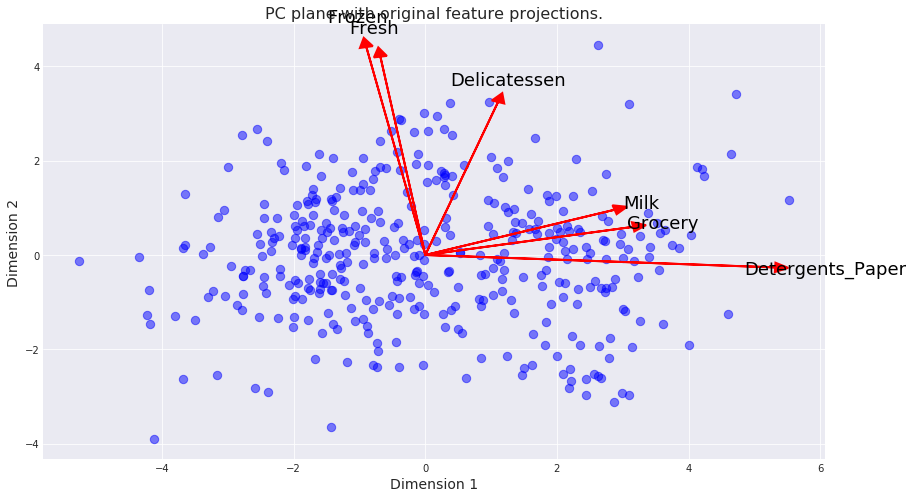

In [19]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**


K-Means
--------

#### Advantages

* With large number of variables, it's faster than hierarchical clustering

* K-Means may produce tighter clusters than hierarchical clustering, especially if the clusters are globular.

#### Cons
* Difficulty in comparing quality of the clusters produced (e.g. for different initial partitions or values of K affect outcome).

* Fixed number of clusters can make it difficult to predict what K should be.

* Does not work well with non-globular clusters.

* Different initial partitions can result in different final clusters. It is helpful to rerun the program using the same as well as different K values, to compare the results achieved.

Gaussian Mixture Model
-------------------------

#### Advantages

* Works well over overlaping data
* It is the fastest algorithm for learning mixture models

* As this algorithm maximizes only the likelihood, it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply.


#### Cons

* The main limitation of the GMM algorithm is that, for computational reasons, it can fail to work if the dimensionality of the problem is too high (i.e. greater than 6 dimensions for instance

* When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.


Conclusion:
-------------------------
K-Means clustering is faster compared to other clustering techniques, more efficient, and does a good job when the distinction between clusters is fairly well defined (meaning overlapping clusters could cause issues). It would typically get hurt by outliers and noise, although I did at least remove most outliers already. K-Means does well with spherical clusters.

Gaussian Mixture Model clustering does a better job with mixing in a little uncertainty (compared to K-Means doing better with more clearly split clusters). This can also handle clusters outside of just a spherical shape better than K-Means.

### What to use:

We are assigned to the analysis of why customers may get unsatisfied if the delivery method changes. We decided to cluster our customers based on their purchase history. As we see, we

    1. Precision is not the key factor in our analysis.
    2. The goal is to explore the dataset.
    3. The shape of our data is more or less circular. Clusters we may see from dataset should be more or less circular.
Due to this, I'd prefer a simpler model: **k-means**. I'm sure we can fine tune our clusters using GMM instead, but it looks like an overengineering in this case.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=2, n_jobs=-1, random_state=20181001)

# TODO: Predict the cluster for each data point
preds = clusterer.fit_predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)
print(score)

0.447157742293467


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

| n_components | silhouette score |
|--------------|------------------|
| 2            |        0.4472    | 
| 3            |        0.3649    |
| 4            |        0.3312 |
| 5            |        0.3527 |

Two clusters has the best score. I tried some higher ones as well but they continued to decrease. I think this does actually make quite a bit of sense looking back at the graph above - there's definitely a density on the left side, with a little bit as well on the right.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

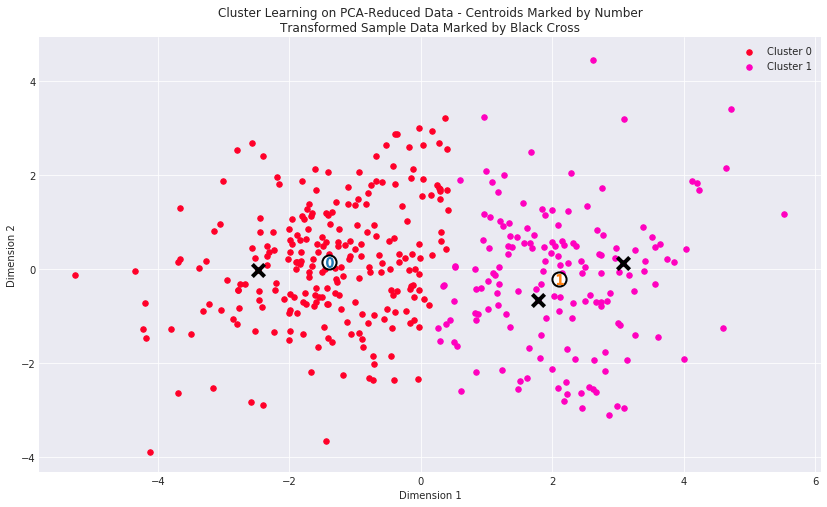

In [30]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments(Sai: 可以理解成 classes), a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [36]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
print("True Centers of each segment:")
display(true_centers)

# Displays difference from the true centers of the clusters to averages of the data
print("\n\nTrue Centers of each segment versus the Mean of the data:")
display(true_centers - data.mean().round())
print("\n\nTrue Centers of each segment versus the Median of the data:")
display(true_centers - data.median().round())

True Centers of each segment:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9451.0,1938.0,2449.0,2200.0,307.0,771.0
Segment 1,5424.0,7780.0,11532.0,1123.0,4444.0,1136.0




True Centers of each segment versus the Mean of the data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-2549.0,-3858.0,-5502.0,-872.0,-2574.0,-754.0
Segment 1,-6576.0,1984.0,3581.0,-1949.0,1563.0,-389.0




True Centers of each segment versus the Median of the data:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,947.0,-1689.0,-2307.0,674.0,-509.0,-195.0
Segment 1,-3080.0,4153.0,6776.0,-403.0,3628.0,170.0


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

To visualize our comparison even further, we can plot a histogram of each category and place both segment centers and category median on the chart. Thus we can analyze both segments and understand what companies they may represent.

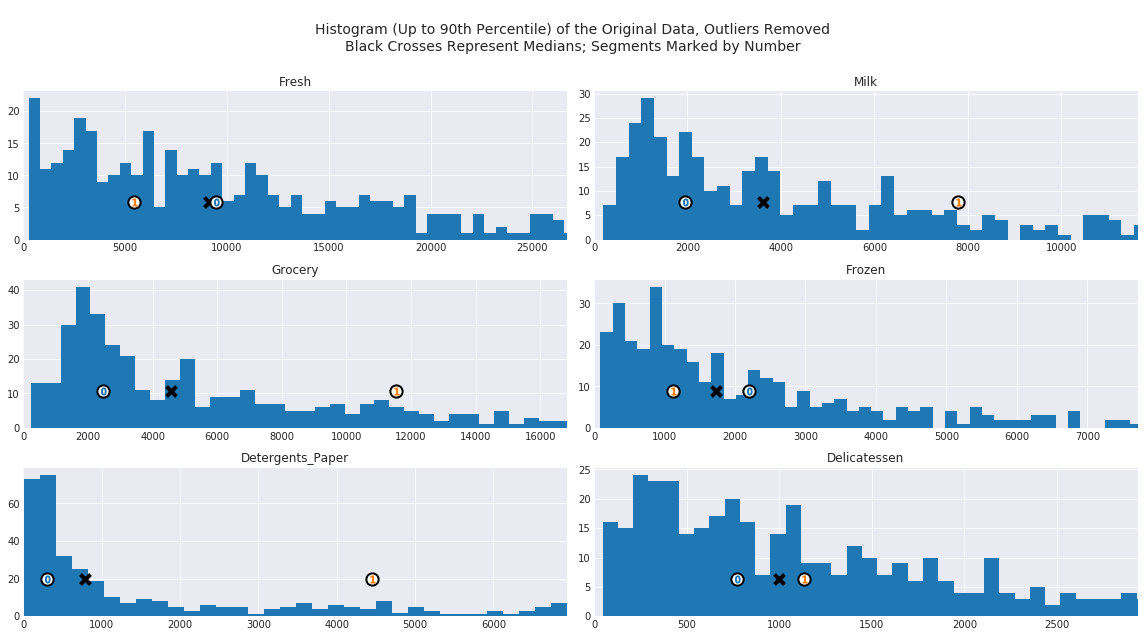

In [38]:
# Let's read the original dataset and remove outliers as we did earlier
dataset = pd.read_csv("customers.csv")
comparable_dataset = dataset.drop(dataset.index[outliers]).reset_index(drop = True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,8))
suptitle = """
Histogram (Up to 90th Percentile) of the Original Data, Outliers Removed
Black Crosses Represent Medians; Segments Marked by Number
"""
plt.suptitle(suptitle, fontsize=14, y=1.1)
for ax, item in zip(axes.flat, list(data.keys())):
    hist_limit = np.percentile(comparable_dataset[item], 90)
    ax.hist(comparable_dataset[item], bins=200)
    y_max = ax.get_ylim()[1]
    ax.set_xlim(0, hist_limit)
    ax.set_ylim(0,y_max)
    ax.scatter(x=comparable_dataset[item].median(), y=y_max/4, s=100, 
               color='black', marker='x',linewidth = 4, zorder=5)
    ax.set_title(item)
    for i, c in enumerate(true_centers[item]):
        ax.scatter(x = c, y = y_max/4, color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=150, zorder=10)
        ax.scatter(x = c, y = y_max/4, marker='$%d$'%(i), alpha = 1, s=50, zorder=10)
        
plt.tight_layout()
plt.show()

From these charts we see the following:

* **Segment 0:** values of `Fresh` and `Frozen` are above the median (average). Values of `Grocery`, `Detegents_Paper` and `Milk` are below the average. Though `Delicatessen` is below the average, it's not that far away from the Segment 1's value. 

* **Segment 1:** values of `Milk`, `Grocery`, `Detergents_Paper` and `Delicatessen` are above the average, moreover, `Detergents_Paper` and `Grocery` values are very distant from the average and from the Segment 0's values.

As we see, Segment 0 companies purchase more `Fresh` and `Frozen` items. Also, they don't purchase any significant amounts of `Detergents_Paper`,`Grocery` and `Milk` (in contrast, Segment 1 companies do).

**The most distinctive feature is that Segment 1 companies buy much more `Grocery`, `Detergents_Paper` and `Milk`** (comparing to median values and Segment 0). These items require little special storage conditions and have a longer shelf life. I'd also say that PC1 in PCA may have captured this relation and this feature quite reliably describes the meaning of PC1.

**A noticable difference between Segment 0 and Segment 1 is the amount of perishable (or refrigerated) items they purchase.** Segment 0 companies require a *relatively* large amounts of fresh goods which have to be replenished frequently. The same holds for frozen items: they can be stored, but require special conditions or refrigerators.


Conclusion:
-------------------------
Segment 0 is more likely to be **supermarkets (organic, fresh and perishable items)** with an emphasis on freshness of their product. If a cafe is one where they say they use all fresh, natural ingredients, they're probably going to fall into this one. Somewhat interesting is that this also still has higher frozen food spending, but overall spending is much lower across the board (other than Fresh), so it makes sense that these would be smaller operations. Delivery time and frequency are critical for these companies.


Segment 1 is a lot more likely to be larger **retailers/grocers**, excluding those with an emphasis on Fresh (it falls well below both the mean and the median for Fresh). Other than Frozen, this is higher across the board, with Milk, Grocery Detergents_Paper and Delicatessen all higher than the median of the data for the given feature. A large retail entity that sells groceries, detergent and paper products (notice that Detergents_paper is over 12 times higher than the true center for Segment 0) is more likely to fit this profile. They don't usually require special refrigeration facilities or need special/frequent delivery schemes.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [39]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
This actually fits fairly closely with my initial thoughts!

0 - Up above, I thought the first sample point was likely to be a large **Restuarant**. The high spending across the board likely helped cluster it here. This does have a little lower probability of being in this cluster than the others, however, so there's potential for it being in Cluster 0 

1 - I thought the next sample point was likely to be a **Coffee shop** or a certain **Restuarant** known specifically for milk product as opposed to normal fresh affair. The high Milk, Frozen and Detergents_Paper score certainly contributed to it being here. It looks like per the above that every single category was predicted to fit more into Cluster 1.

2 - The final sample point, which I originally thought to be a **Meat retailer/supermarkets**, certainly fits into Cluster 0 (**supermarkets**). It's spending is much lower, so it seems to fit in well with this cluster. Interestingly enough.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
We can predict the segments of the customers that reacted positively. And if most of the customers that reacted positively fall in the same segment, he can make the change to all the customers in the segment.

We have segmented the customers in two segments: retailears and caffe/restaurant/hotel. The caffe/restaurant/hotel expends a lot of money in detergent paper, milk, grocery, etc but retailers expend less money. It seems that they wouldn't be affected to have the delivery 3 times a week instead of 5 days because they consume less. But the other group needs to have milk and fresh more often, restaurant/hotel/caffe are going to need the merchandise more often. So 5 times a week is more appropiate for this group. 

The changes is going to affect more to segment 1 (cafe/hotel/restorant)

To verify the hypothesis, we can do A/B testing. We build 2 emails, one offering 5 days delivery and the other one, 3 days delivery.
We build two groups of customers. Each group is going to be compose with X quantity of retailers and X quantity of cafe/hotel/restorant. Each group is going to be compose with X quantity of retailers and X quantity of cafe/hotel/restorant. X should be an smaller part of the total customers, for example, 5%. Both group are going to have the same quantity of customers and in the same retailers-hotel proporsion.

We send email to both groups and we are going to have the click in each group. We can sumarize the results using this table

|        |     |5-days email |
|--------|-------------------|
| Group 1|Retailers     |
|  (5%) |Hotel/Cafe/Restaurant |  


|        |     |3-days email |
|--------|-------------------|
| Group 2  |Retailers   | 
|    (another 5%)   |Hotel/Cafe/Restaurant |  

So, you are going to test both option over the 10% of your customers. Based on that information, we can make a decision to extend it to the rest of the customers. And due that we have two clusters, we can differente the results by cluster. For example, retailers 5 days and  hotel/restaurant/cafe 3 days.


### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We could create a customer segment supervised learner using the classifiers identified above for our original customers as the labels. The target variable here would be the customer segment of the new customers, with their spending by category again as the features.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

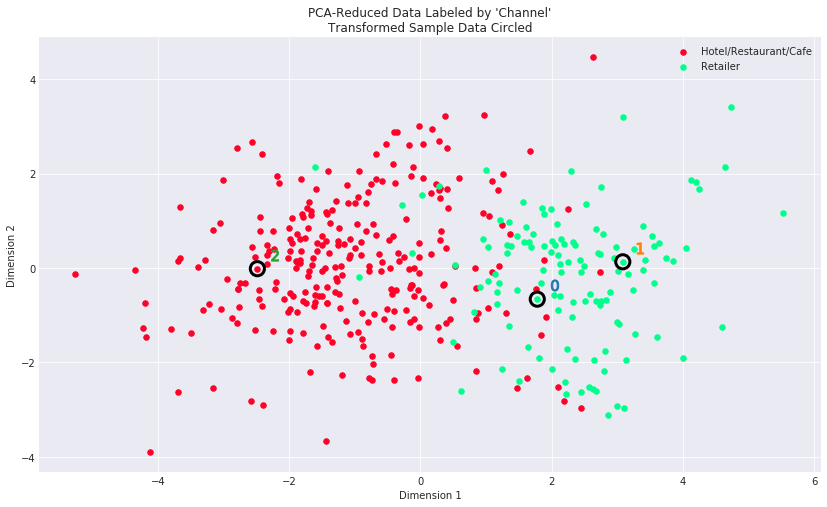

In [53]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

I'd say that the clustering algorithm (k-means) and the k value I've chosen, performed pretty well comparing to the real distribution of HoReCa and Retail customers. We can definitely compare the values of real clusters and the predicted ones to get the accuracy score, but this is a final check only procedure and it looks like overfitting on test set (for example, if we want to compare several clustering algorithms like k-means, spectral and GMM).

By the original distribution, the segments are _really_ HoReCa and Retail, this is described in the project [documentation](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers).

To be more specific on the quality of my clustering, I'd calculate F1 metric.

In [54]:
from sklearn.metrics import f1_score

# HoReCa and Retail segments are {1,2} in the original dataset, {0,1} in our clusters
comparable_dataset['Channel_Segment'] = comparable_dataset['Channel'].apply(lambda x: x-1)

y_true = np.array(comparable_dataset['Channel_Segment'])
y_pred = preds
f1_score(y_true, y_pred)

0.8368794326241135

We see that the score is 0.85, this is a very good score. We can conclude that the k-means algorithm indeed generalized the data well. There are several ways to improve the score:

* We can use GMM to tune the score.

* We can look at a totally different algorithm like T-SNE and do the whole analysis with T-SNE . This may give us better results, but it looks like an overengineering again.

**To wrap up, we've completed the analysis:**

1. We cleaned the dataset, transformed it to a fewer dimensions, clustered it and visualized the results. The clustering algorithm did well and found two clusters of data. 

2. Then we understood that the one cluster corresponds with HoReCa customers who require frequent deliveries of fresh items, the other one — with large Retail customers who can be comfortable with less frequent deliveries.

3. We decided on how to run A/B test, found the reasonable amount of customers to test on, described who these customers can be.

4. The results of this test can be used for the supervised algorithm which can help us predict the reaction of the other customers to this new delivery method.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.